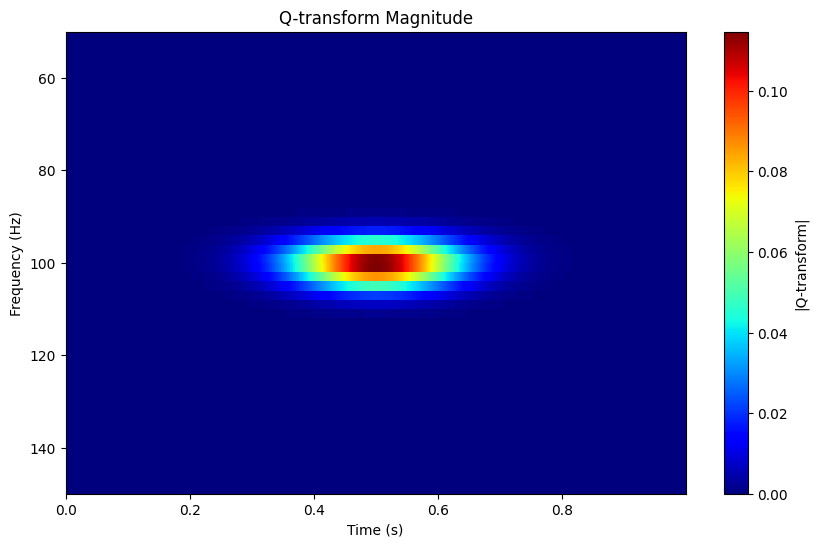

(50, 1024)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def q_transform(x, t, freqs, Q):
    """
    对时域信号 x(t) 计算 Q transform。
    
    参数：
      x     -- 时域信号（一维 numpy 数组）
      t     -- 与 x 对应的时间轴（单位秒，一维数组）
      freqs -- 希望计算 Q transform 的中心频率数组（单位 Hz）
      Q     -- 预设的 Q 值（通常为常数，也可以设为与 f 相关的数组）
    
    返回：
      X_q   -- 二维复数组，形状 (len(freqs), len(t))，其中 X_q[i, j] 表示中心频率 freqs[i]、中心时间 t[j] 下的变换系数
    """
    dt = t[1] - t[0]
    X_q = np.zeros((len(freqs), len(t)), dtype=complex)
    # 对每个中心频率 f
    for i, f in enumerate(freqs):
        # 对应窗口宽度 tau：这里常用定义 tau = Q/(2π f)
        # 注意不同定义下 tau 的取值可能会略有差别，本例采用 Q/(2π f)
        tau = Q / (2 * np.pi * f)
        # 归一化因子，使基函数满足单位归一性
        norm = np.sqrt(f / (np.sqrt(2 * np.pi) * Q))
        
        # 依次对每个中心时刻 t0
        for j, t0 in enumerate(t):
            t_diff = t - t0
            # 基函数 (取共轭后用于内积计算，即 ψ*(t-t0))
            psi = norm * np.exp(-0.5 * (f * t_diff / Q)**2) * np.exp(-2j * np.pi * f * t_diff)
            # 利用梯形积分计算内积：∫ x(t)*ψ*(t-t0) dt
            X_q[i, j] = np.trapz(x * psi, t)
    return X_q

# -----------------------------------------------------
# 生成一个测试信号：sine-Gaussian burst
# -----------------------------------------------------
fs = 1024.0             # 采样频率 1024 Hz
T_total = 1.0           # 信号时长 1 s
N = int(T_total * fs)
t = np.linspace(0, T_total, N, endpoint=False)
# 生成一段 sine-Gaussian 信号：
fc = 100.0              # 中心频率 100 Hz
sigma = 0.05            # 包络宽度（秒）
signal = np.sin(2 * np.pi * fc * t) * np.exp(- (t - 0.5)**2 / (2 * sigma**2))

# -----------------------------------------------------
# 定义 Q transform 所用的中心频率网格和 Q 值
# -----------------------------------------------------
f_min = 50.0    # 最低中心频率
f_max = 150.0   # 最高中心频率
num_f = 50      # 频率取 50 个点
freqs = np.linspace(f_min, f_max, num_f)
Q_value = 8.0   # 设定 Q 值

# -----------------------------------------------------
# 计算 Q transform
# -----------------------------------------------------
X_q = q_transform(signal, t, freqs, Q_value)

# -----------------------------------------------------
# 显示 Q transform 的幅值图
# -----------------------------------------------------
# 我们取绝对值并显示对数尺度（也可以直接显示幅值）
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(X_q), aspect='auto', extent=[t[0], t[-1], freqs[-1], freqs[0]],
           interpolation='nearest', cmap='jet')
plt.colorbar(label='|Q-transform|')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Q-transform Magnitude')
plt.show()
print(X_q.shape)

IndexError: index 0 is out of bounds for axis 0 with size 0